In [4]:
import numpy as np
from scipy.sparse.linalg import eigsh
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import clear_output
%matplotlib inline
from ipywidgets import interactive
from ipywidgets import widget_int
from IPython.display import display

## Задание 12
# Решение уравнения теплопроводности схемой Кранка-Николсон
## Параметры сетки и функции
Здесь задаются все требуемые при расчете параметры и функции.

In [5]:
nt = 100
dt = 0.005

N = 1000
h = 1/(N+1)
xnet = np.array([h*(i+1) for i in range(N)])

D = 1
mu = D*dt/2/h**2
u0 = np.sin(np.pi*xnet)

## Схема 

In [6]:
ones = np.ones((N,))
A = np.diag(-mu*ones[1:], -1) + np.diag((1+2*mu)*ones, 0) + np.diag(-mu*ones[1:], +1)
Ainv = np.linalg.inv(A)
B = A = np.diag(mu*ones[1:], -1) + np.diag((1-2*mu)*ones, 0) + np.diag(mu*ones[1:], +1)
AB = np.dot(Ainv, B)

In [7]:
u = [u0]
for t in range(nt):
    u.append(np.dot(AB,u[-1]))

In [107]:
def plot_solution(a=0):
    plt.plot(xnet, u[a])
    plt.ylim(0,1)
    plt.xlim(0,1)
    plt.xlabel('$x$')
    plt.ylabel('$u(x,t)$')
    plt.text(0.5-0.057, u[a][N//2]-0.05, 't = %.3f'% float(a*dt))

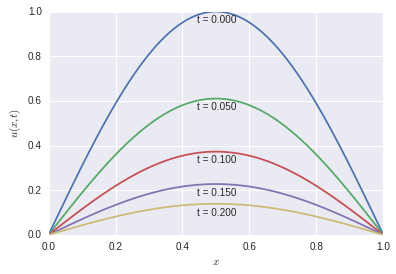

In [108]:
for i in range(0, 50, 10):
    plot_solution(i)